In [1]:
using Revise
using Condor
using NPZ
using Healpix
using Plots
using PyCall
using Falcons
using PyPlot
hp = pyimport("healpy");

┌ Info: Precompiling Condor [ce3e846d-a250-429b-81e6-e6cf6b410658]
└ @ Base loading.jl:1423


# Expand real-space gaussian beam to harmonic space

Calculating multipoles up to lmax = 767, mmax = 767


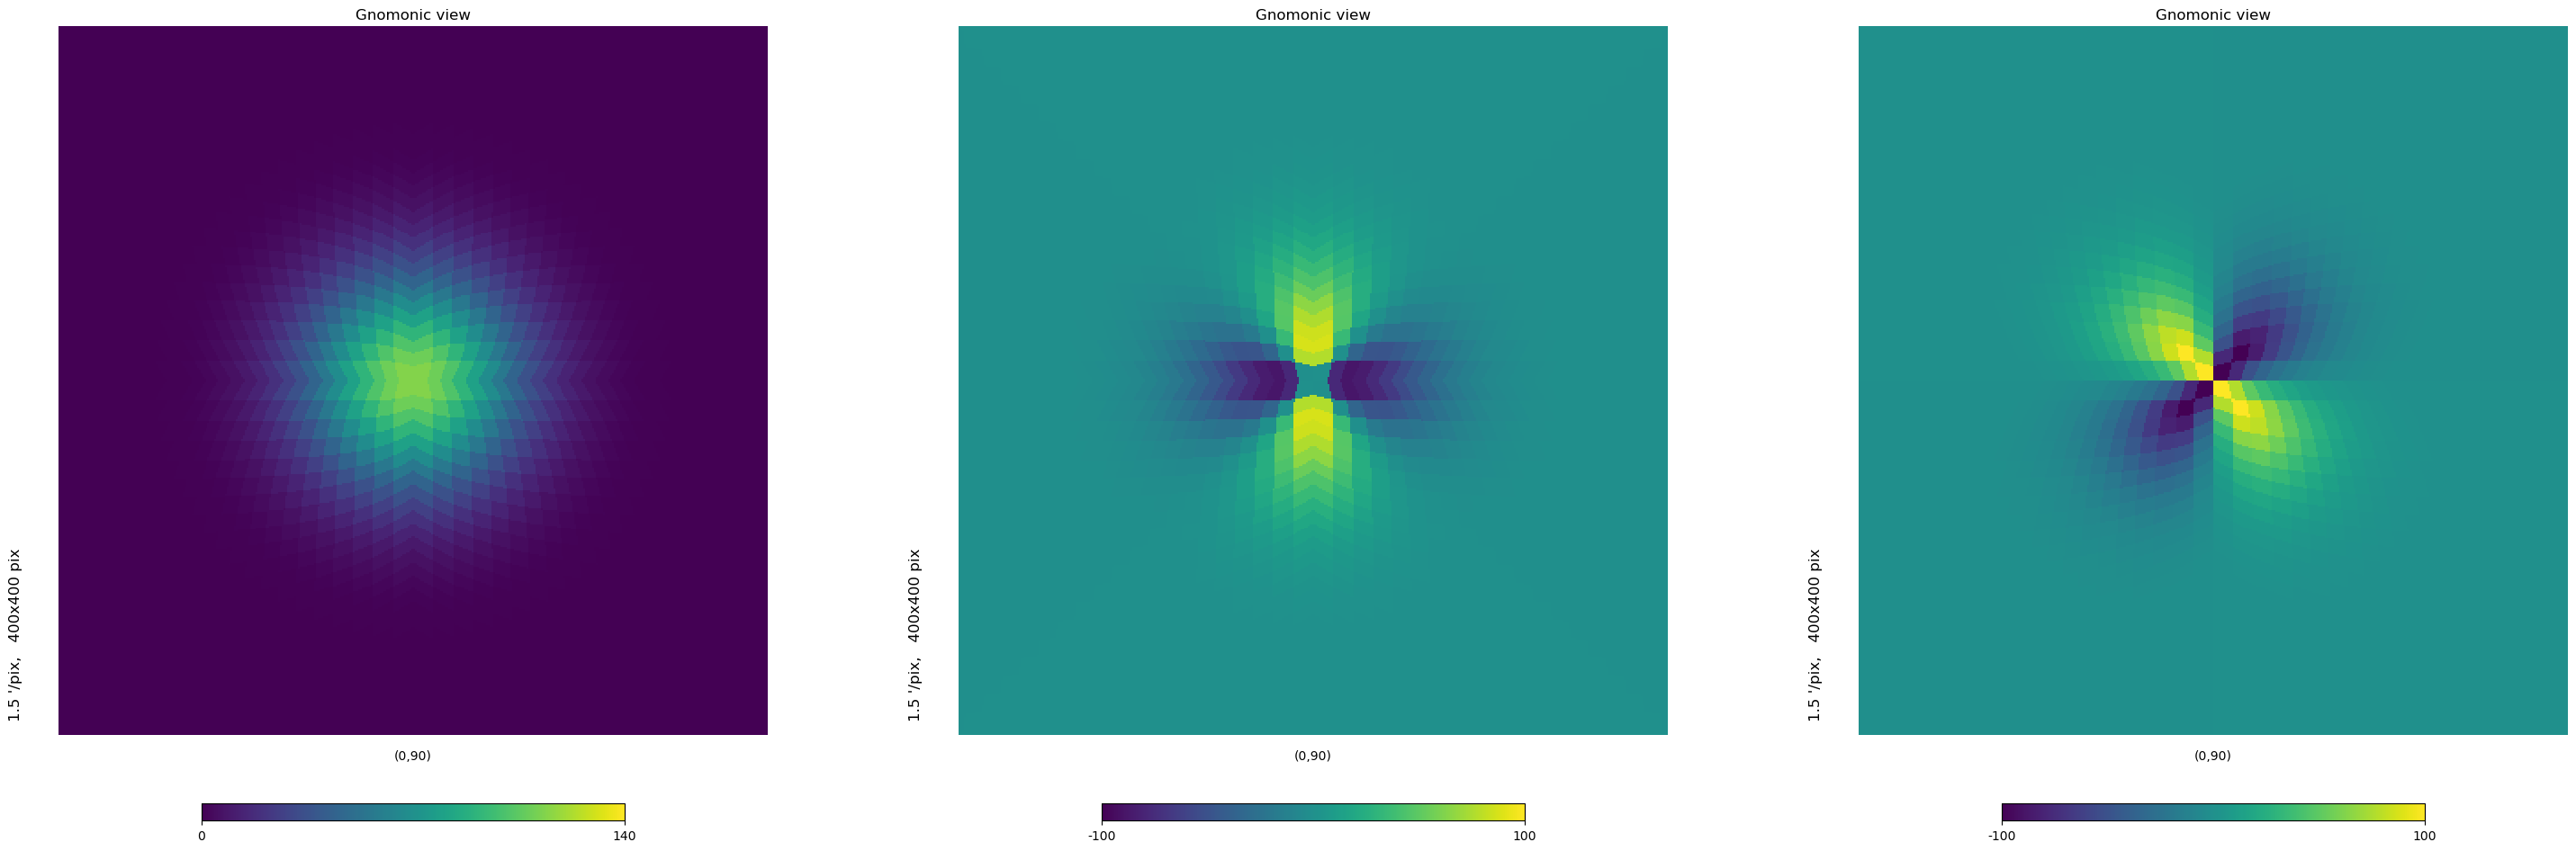

In [32]:
gauss_beam = bm_polar_init(1000, 1001, 0.0, π/2)
s = fwhm2std(deg2rad(5))
gauss_beam.stokes[1,:,:] = ones(1000) .* transpose(angular_gaussbeam(0:π/1000:π, s));
gauss_beam.stokes[2,:,:] = ones(1000) .* transpose(angular_gaussbeam(0:π/1000:π, s));

nside = 256
lmax = 3nside-1
mmax = 3nside-1
weight_path = "/group/cmb/litebird/usr/full_weights/healpix_full_weights_nside_$(lpad(nside,4,'0')).fits"
Args = Dict(
    "beam_main_file_polar" => gauss_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => mmax,
    "beam_healpix_output" => true,
    "full_weight_path" => weight_path,
    "healpy_convention" => true
)

map_blm = beam2alm(Args);
S = 400
plt.figure(figsize=(30,10))
hp.gnomview(map_blm[1].i.pixels, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S, min=0, max=140)
hp.gnomview(map_blm[1].q.pixels, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S, min=-100, max=100)
hp.gnomview(map_blm[1].u.pixels, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S, min=-100, max=100)

# Expand GRASP grid format beam to harmonic space

Calculating multipoles up to lmax = 767, mmax = 767


┌ Warning: Healpix full weight was taken into account before expanding the beam map to blm. If you want to change the full weight used, specify `full_weight_path=<path>`.
└ @ Condor /gpfs/home/cmb/yusuket/program/beam/beam_study2/Condor.jl/src/function/beams/beam2alm.jl:91


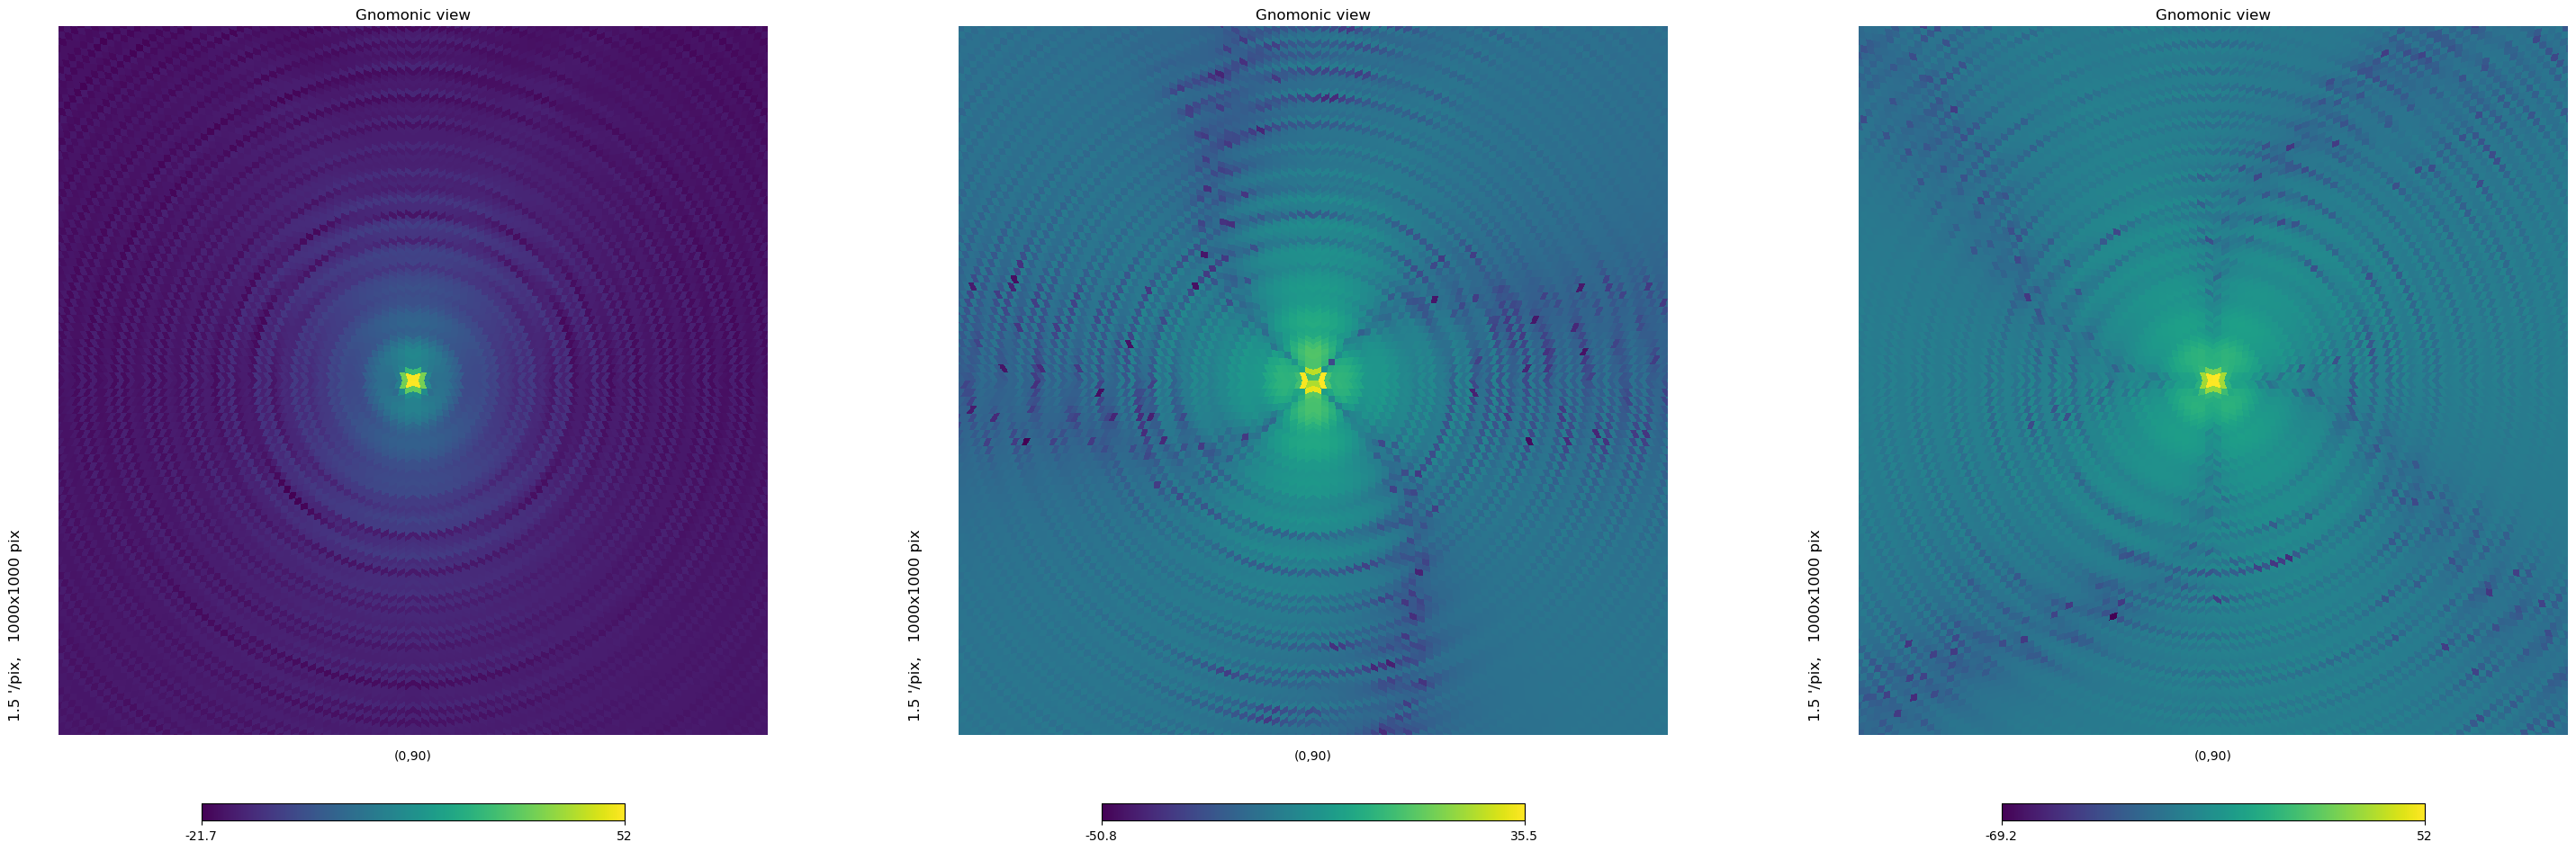

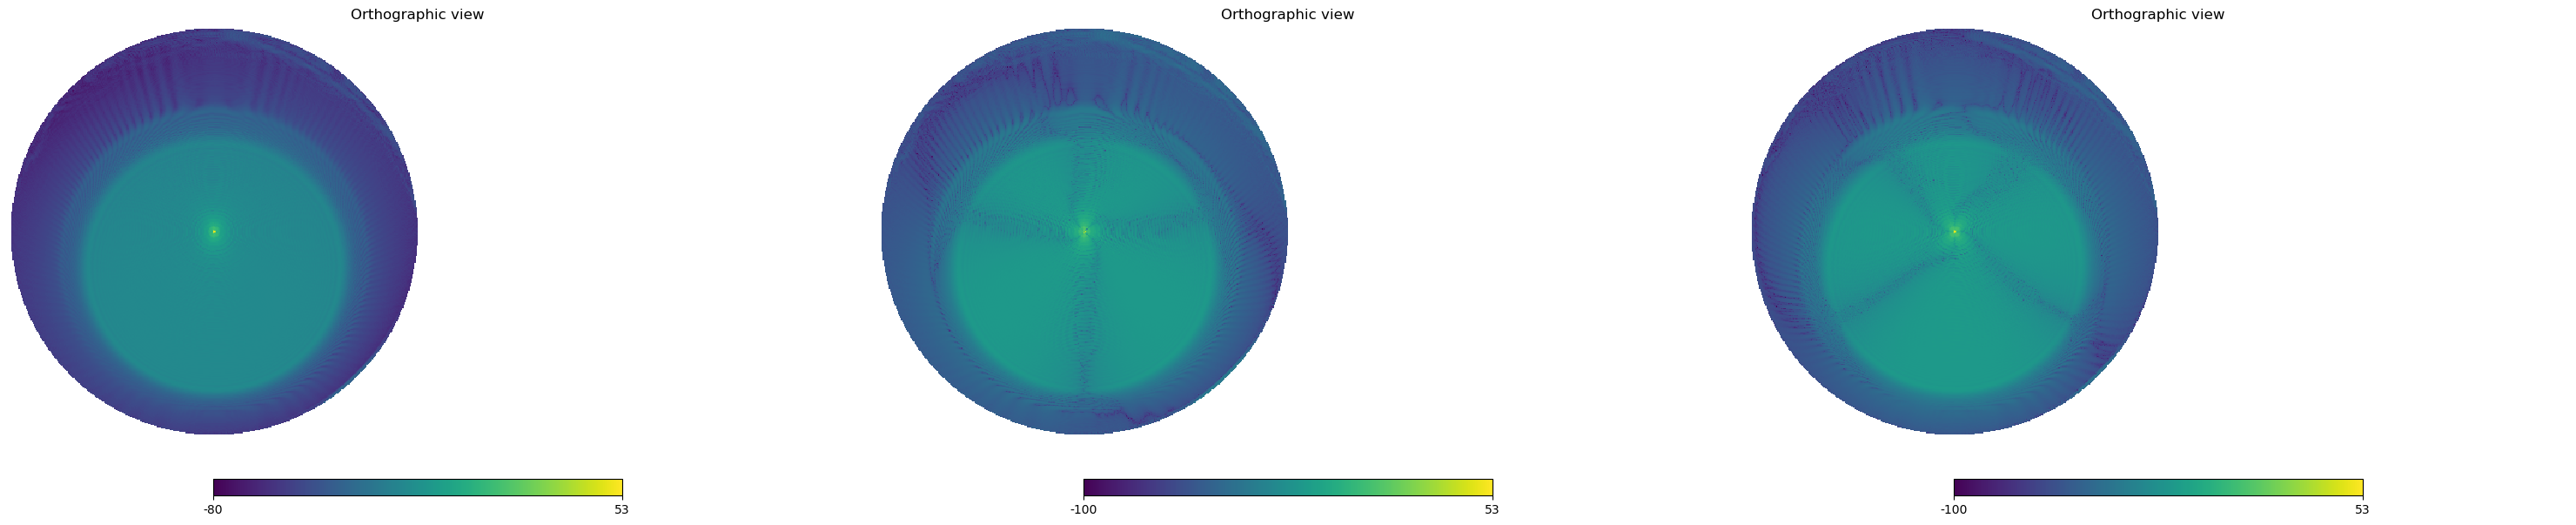

In [3]:
bm_grid = bm_grid_read("/group/cmb/litebird/usr/nersc/GRASP/MHFT/pix0005_402_pp_f2p2_v4_hft_tp.grd")
pol_beam = bm_grid2polar(bm_grid; copol = "x");

nside = 256
lmax = 3nside-1
mmax = 3nside-1

Args = Dict(
    "beam_main_file_polar" => pol_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => mmax,
    "beam_healpix_output" => true,
    "use_full_weight" => true,
)

sym_map_blm = beam2alm(Args);

S = 1000
plt.figure(figsize=(30,10))
hp.gnomview(sym_map_blm[1].i.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].q.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].u.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S)

plt.figure(figsize=(30,10))
hp.orthview(sym_map_blm[1].i |> absdbi, rot=(0,90), min=-80,max=53, sub=(1,3,1))
hp.orthview(sym_map_blm[1].q |> absdbi, rot=(0,90), min=-100,max=53, sub=(1,3,2))
hp.orthview(sym_map_blm[1].u |> absdbi, rot=(0,90), min=-100,max=53, sub=(1,3,3))

Calculating multipoles up to lmax = 767, mmax = 767


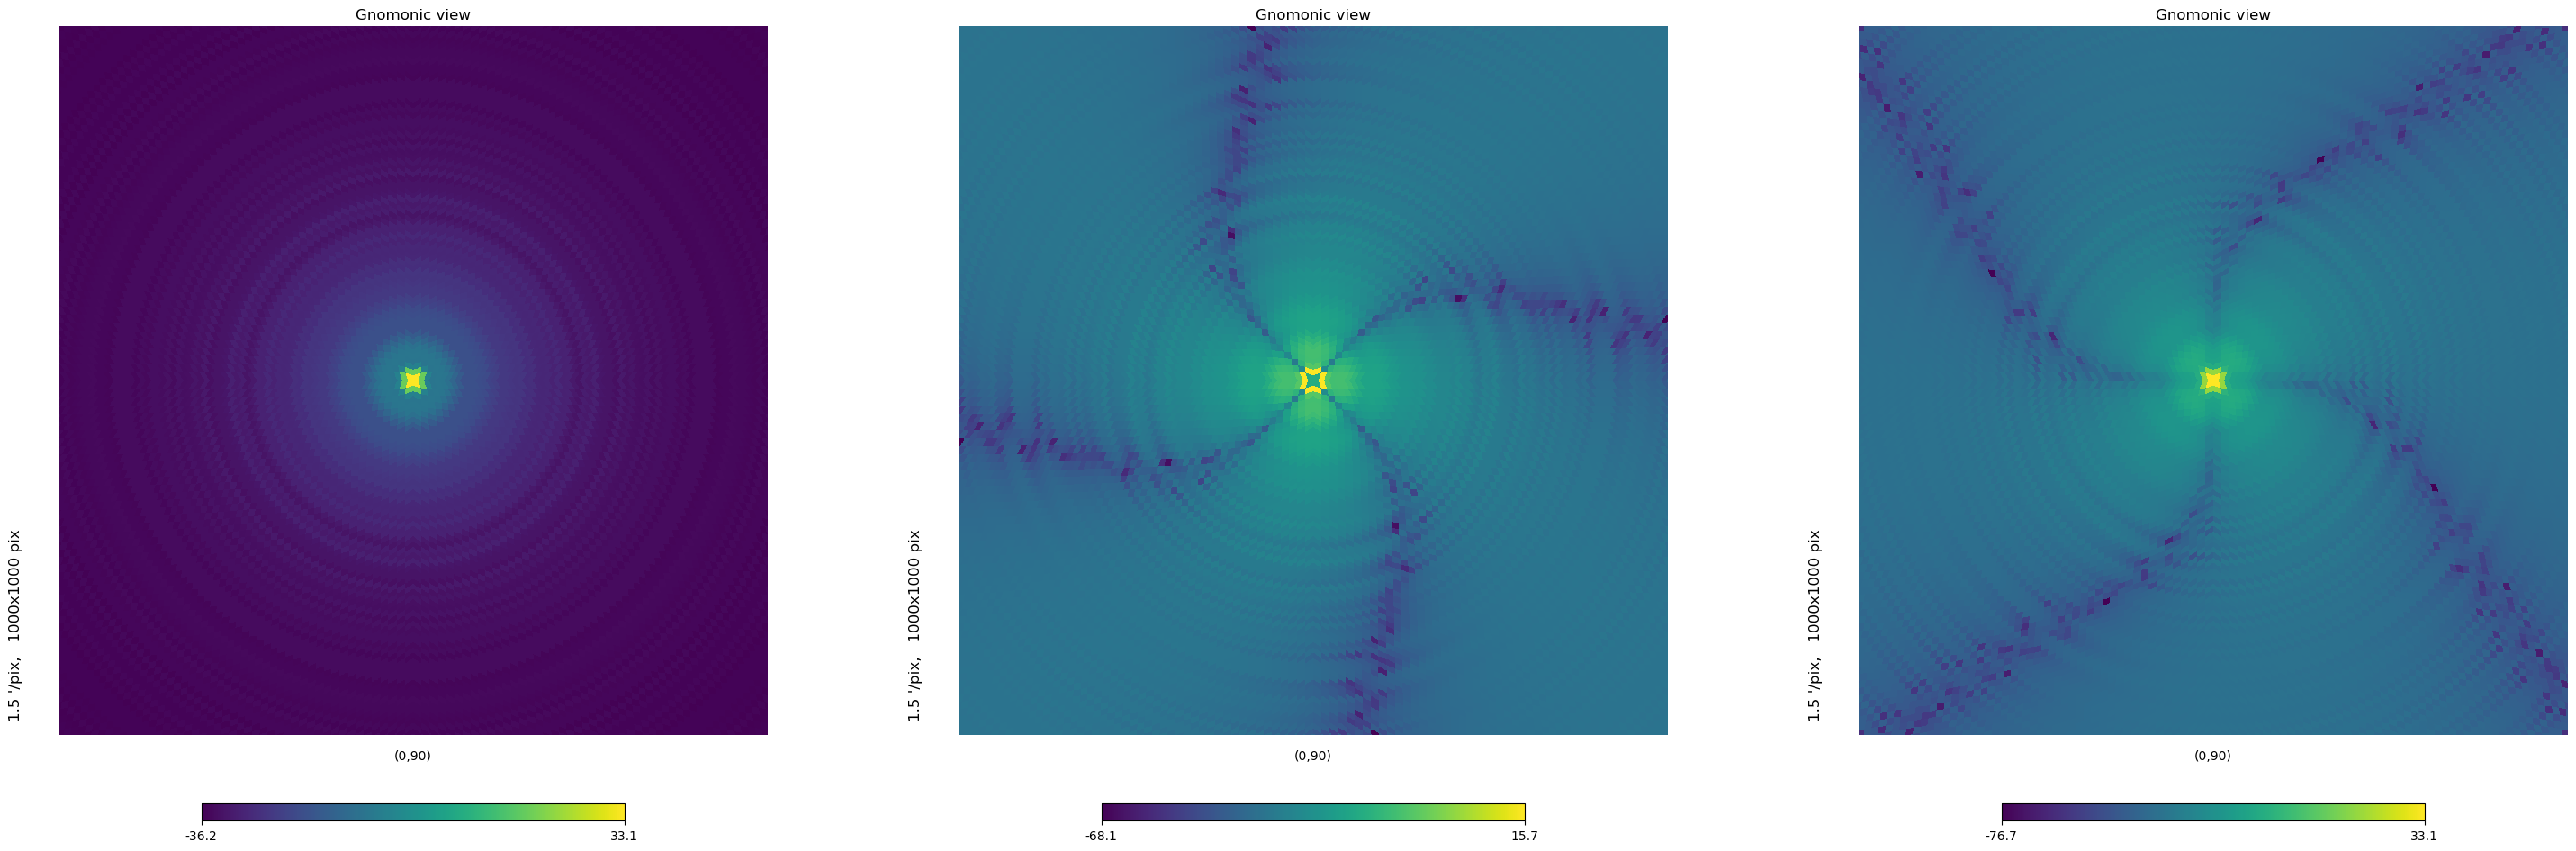

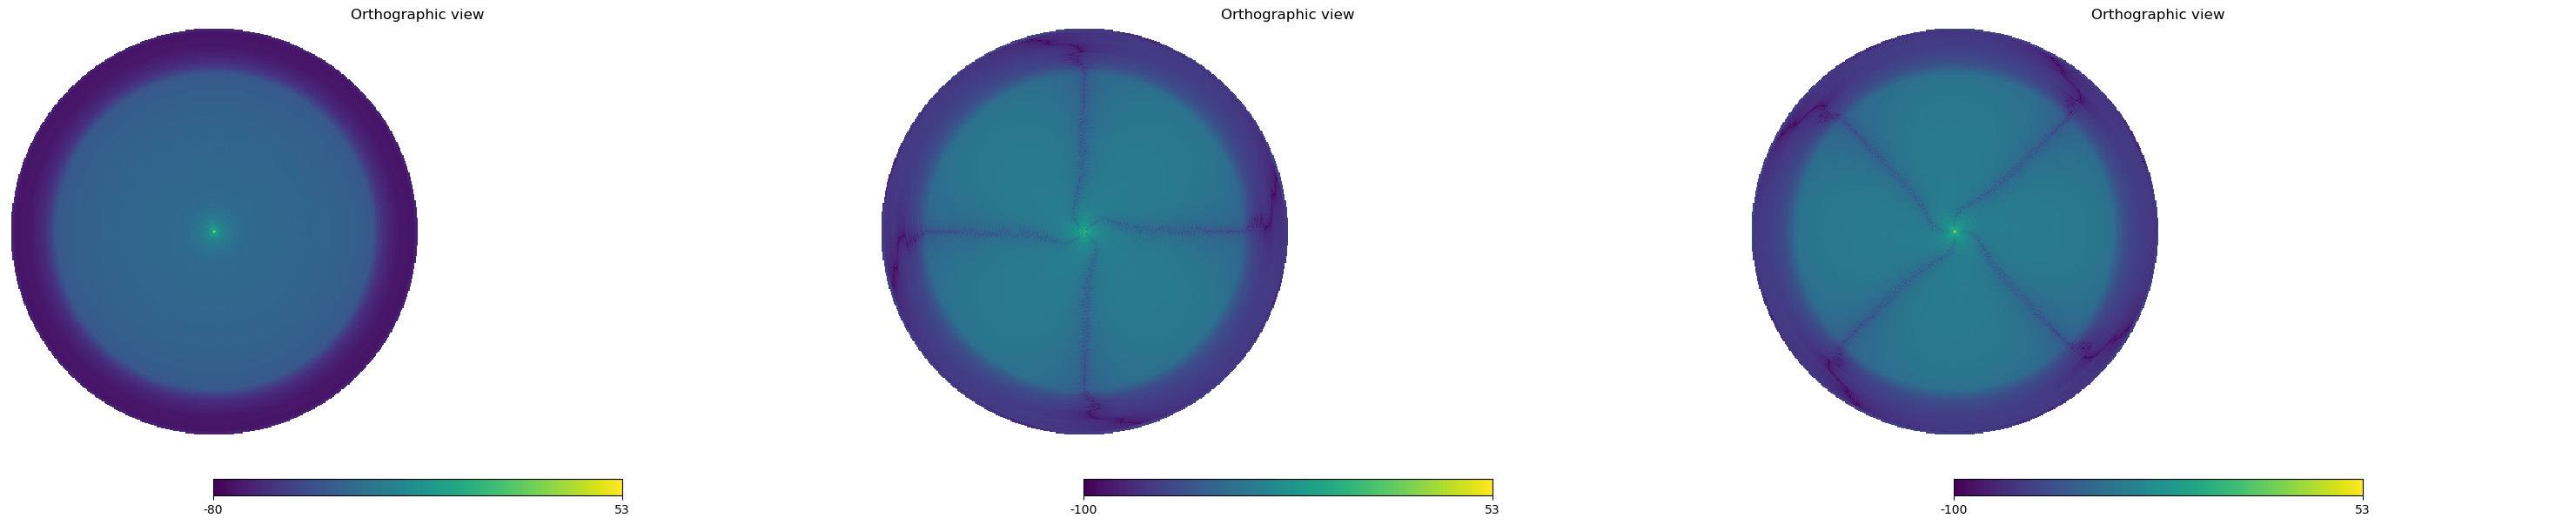

In [4]:
grid = bm_grid_read("/group/cmb/litebird/usr/nersc/GRASP/MHFT/pix0005_402_pp_f2p2_v4_hft_tp.grd")
pol_beam = bm_grid2polar(grid; copol = "x");

nside = 256
lmax = 3nside-1
mmax = 3nside-1
pol_beam = symmetrize(pol_beam, 0:0.1:2π, true)

Args = Dict(
    "beam_main_file_polar" => pol_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => mmax,
    "beam_healpix_output" => true,
    "full_weight_path" => weight_path
)

sym_map_blm = beam2alm(Args);

S = 1000
plt.figure(figsize=(30,10))
hp.gnomview(sym_map_blm[1].i.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].q.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].u.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S)


plt.figure(figsize=(30,10))
hp.orthview(sym_map_blm[1].i |> absdbi, rot=(0,90), min=-80,max=53, sub=(1,3,1))
hp.orthview(sym_map_blm[1].q |> absdbi, rot=(0,90), min=-100,max=53, sub=(1,3,2))
hp.orthview(sym_map_blm[1].u |> absdbi, rot=(0,90), min=-100,max=53, sub=(1,3,3))

# Expand GRASP cut format beam to harmonic space

Calculating multipoles up to lmax = 767, mmax = 767


┌ Warning: Healpix full weight was taken into account before expanding the beam map to blm. If you want to change the full weight used, specify `full_weight_path=<path>`.
└ @ Condor /gpfs/home/cmb/yusuket/program/beam/beam_study2/Condor.jl/src/function/beams/beam2alm.jl:91


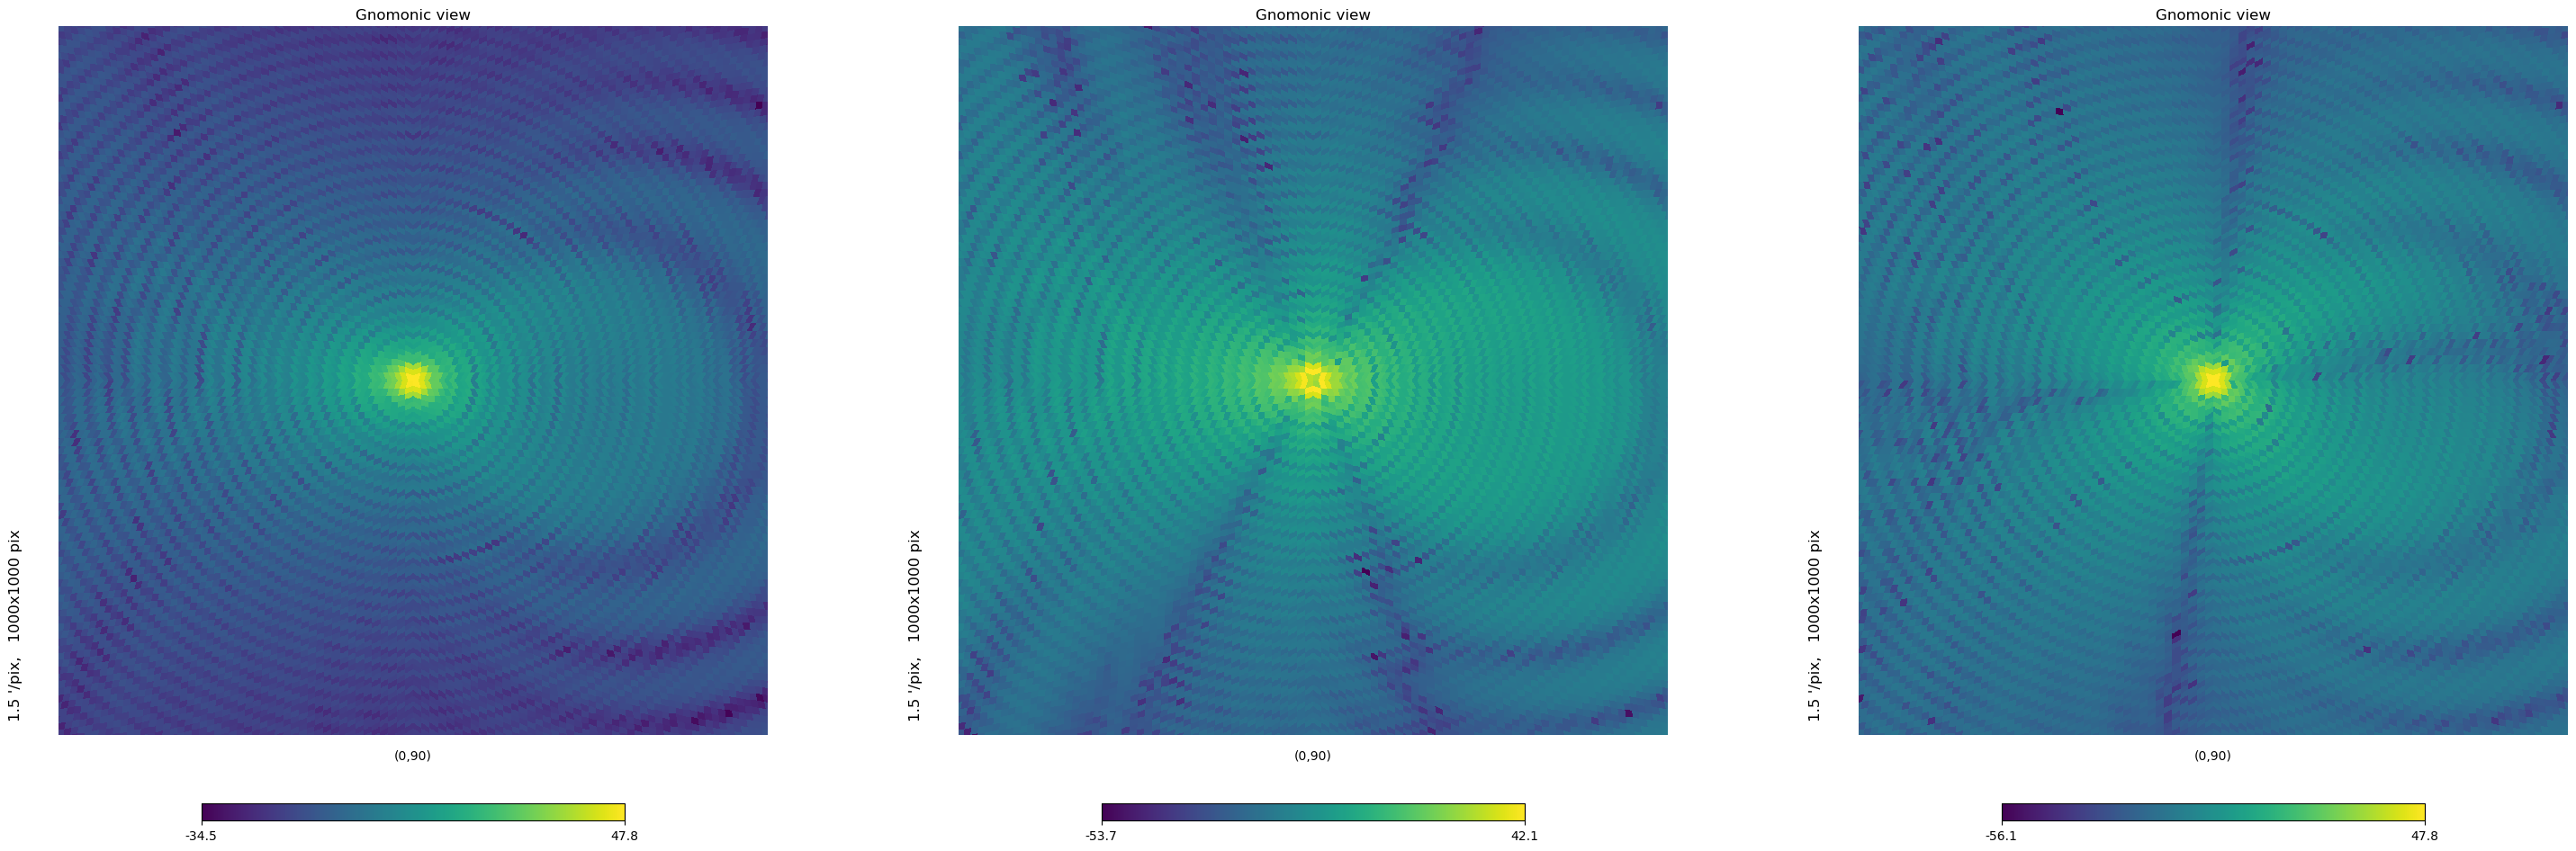

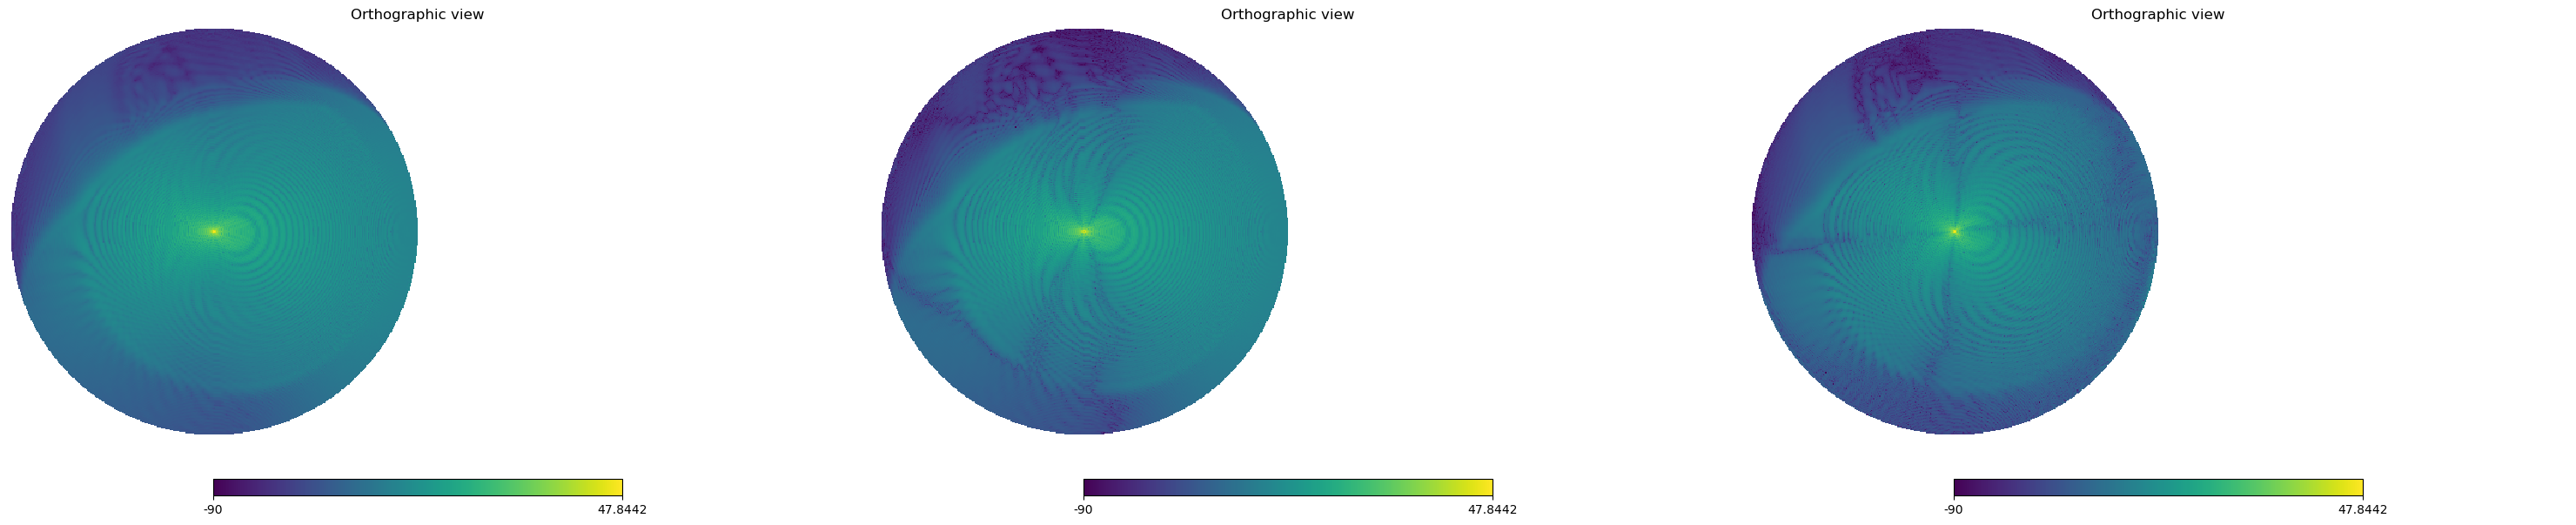

In [30]:
file = "/group/cmb/litebird/usr/beams/imo-v1.3/MFU_Beams_IMo_v1.3/001_006_026_UA_119_B.cut"
#file = "/group/cmb/litebird/usr/beams/hiroaki_MHFT/MFT_88.5GHz_000.0_166.7_xpol_v2.cut"
#file = "/home/cmb/yusuket/program/beam/beam_study2/grasp_beamfiles/hiroaki_MHFT/MFT_88.5GHz_000.0_166.7_xpol_v2.cut"
bm_cut = bm_cut_read(file)
pol_beam = bm_cut2polar(bm_cut, copol = "x");

nside = 256
lmax = 3nside-1
mmax = 3nside-1

#pol_beam = symmetrize(pol_beam, [0], true)

Args = Dict(
    "beam_main_file_polar" => pol_beam,
    "beam_nside" => nside,
    "beam_lmax" => lmax,
    "beam_mmax" => mmax,
    "beam_healpix_output" => true,
    "use_full_weight" => true,
)

sym_map_blm = beam2alm(Args);
max = sym_map_blm[1].i.pixels |> maximum |> dbi

S = 1000
plt.figure(figsize=(30,10))
hp.gnomview(sym_map_blm[1].i.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,1), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].q.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,2), xsize=S, ysize=S)
hp.gnomview(sym_map_blm[1].u.pixels |> absdbi, norm="none", rot=(0,90), sub=(1,3,3), xsize=S, ysize=S)

plt.figure(figsize=(30,10))
hp.orthview(sym_map_blm[1].i |> absdbi, rot=(0,90), min=-90, max=max, sub=(1,3,1))
hp.orthview(sym_map_blm[1].q |> absdbi, rot=(0,90), min=-90, max=max, sub=(1,3,2))
hp.orthview(sym_map_blm[1].u |> absdbi, rot=(0,90), min=-90, max=max, sub=(1,3,3))